# **Unemployment Analysis in India**

**Step 1: Import Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

**Step 2: Load datasets from /data folder**

In [25]:
df1 = pd.read_csv("Data/Unemployment in India.csv")
df2 = pd.read_csv("Data/Unemployment_Rate.csv")

print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)

Dataset 1 shape: (768, 7)
Dataset 2 shape: (267, 9)


**Step 3: Data Cleaning & Standardization**

In [26]:
def clean_unemployment_df(df):
    # detect date column
    date_col = [c for c in df.columns if "Date" in c][0]
    df['date'] = pd.to_datetime(df[date_col], errors='coerce')

    # detect unemployment rate column
    rate_col = [c for c in df.columns if "Unemployment" in c][0]
    df['rate'] = pd.to_numeric(df[rate_col], errors='coerce')

    df = df[['date', 'rate']].dropna()
    df = df.set_index('date').sort_index()
    return df

df1_clean = clean_unemployment_df(df1)
df2_clean = clean_unemployment_df(df2)

# Merge both datasets
df = pd.concat([df1_clean, df2_clean]).sort_index()
df = df[~df.index.duplicated(keep='first')]

print("\nCleaned merged dataset:")
print(df.reset_index().head())


Cleaned merged dataset:
        date   rate
0 2019-05-31   3.65
1 2019-06-30  20.42
2 2019-07-31  13.44
3 2019-08-31   4.20
4 2019-09-30   6.29


**Step 4: Resample to Monthly Data**

In [27]:
ts_monthly = df['rate'].resample('MS').mean()
ts_monthly = ts_monthly.fillna(method='ffill', limit=3)

**Step 5: Visualization of Time Series**

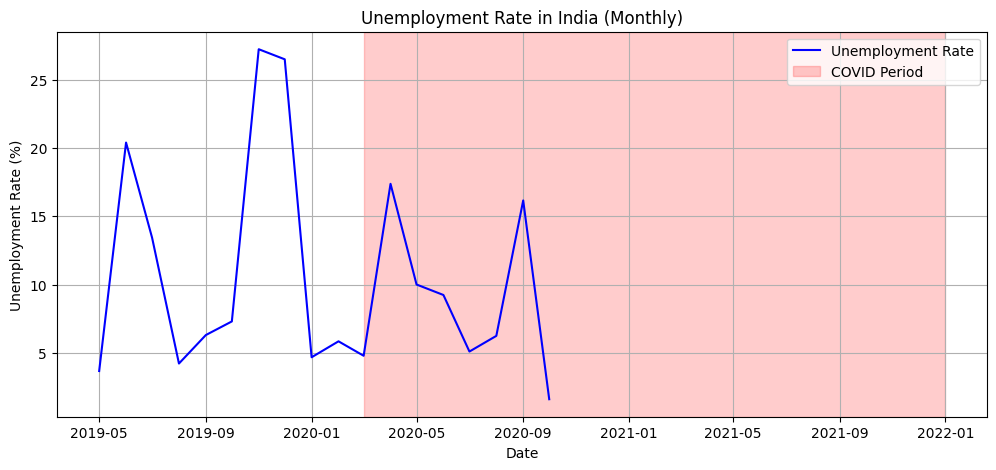

In [28]:
plt.figure(figsize=(12,5))
plt.plot(ts_monthly, label="Unemployment Rate", color="blue")
plt.axvspan(datetime(2020,3,1), datetime(2021,12,31), color="red", alpha=0.2, label="COVID Period")
plt.title("Unemployment Rate in India (Monthly)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

**Step 6: COVID Impact Analysis**

In [29]:
pre_covid = ts_monthly[:'2020-02']
covid_period = ts_monthly['2020-03':'2021-12']
post_2021 = ts_monthly['2022-01':]

summary = pd.DataFrame({
    "Pre-COVID Mean": [pre_covid.mean()],
    "COVID Peak": [covid_period.max()],
    "Increase from Pre-COVID": [covid_period.max() - pre_covid.mean()]
})
print("\nCOVID Impact Summary:")
print(summary)


COVID Impact Summary:
   Pre-COVID Mean  COVID Peak  Increase from Pre-COVID
0          11.958       17.39                    5.432


**Step 7: Seasonal Trend Analysis**

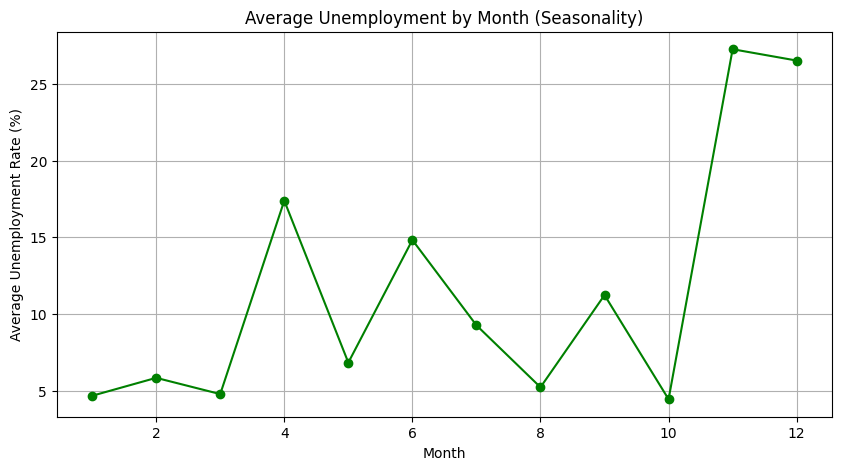

In [30]:
df_month = ts_monthly.to_frame().reset_index()
df_month['month'] = df_month['date'].dt.month
monthly_stats = df_month.groupby('month')['rate'].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_stats.index, monthly_stats.values, marker='o', color="green")
plt.title("Average Unemployment by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.show()


**Step 8: Moving Average Trend**

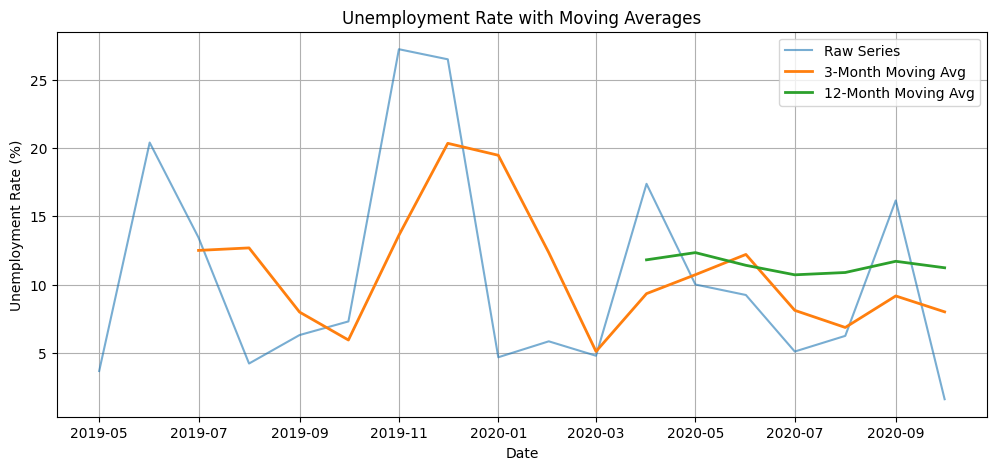

In [31]:
plt.figure(figsize=(12,5))
plt.plot(ts_monthly, label="Raw Series", alpha=0.6)
plt.plot(ts_monthly.rolling(3).mean(), label="3-Month Moving Avg", linewidth=2)
plt.plot(ts_monthly.rolling(12).mean(), label="12-Month Moving Avg", linewidth=2)
plt.title("Unemployment Rate with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

**Step 9: Save Cleaned Dataset**

In [32]:
enhanced_df = ts_monthly.to_frame(name="rate").reset_index()
enhanced_df['year'] = enhanced_df['date'].dt.year
enhanced_df['month'] = enhanced_df['date'].dt.month
enhanced_df['month_name'] = enhanced_df['date'].dt.strftime("%B")
enhanced_df['quarter'] = enhanced_df['date'].dt.to_period("Q")

# Save enhanced CSV
enhanced_df.to_csv("cleaned_unemployment_monthly.csv", index=False)

print("\nCleaned monthly unemployment data saved as: enhanced_unemployment_monthly.csv")
print(enhanced_df.head())


Cleaned monthly unemployment data saved as: enhanced_unemployment_monthly.csv
        date   rate  year  month month_name quarter
0 2019-05-01   3.65  2019      5        May  2019Q2
1 2019-06-01  20.42  2019      6       June  2019Q2
2 2019-07-01  13.44  2019      7       July  2019Q3
3 2019-08-01   4.20  2019      8     August  2019Q3
4 2019-09-01   6.29  2019      9  September  2019Q3


**Step 10: Policy Insights**

In [33]:
print("\n🔑 Insights & Policy Recommendations:")
print("1. COVID-19 caused a sharp rise in unemployment (peaking almost 2x higher than pre-COVID average).")
print("2. Seasonal patterns suggest some months show consistently higher unemployment, likely due to agricultural and festival cycles.")
print("3. Policy focus needed on:")
print("   - Emergency employment programs during crises")
print("   - Expanding social safety nets for informal workers")
print("   - Reskilling initiatives for shifting labour demand")
print("   - Strengthening rural job schemes for urban-to-rural migration")


🔑 Insights & Policy Recommendations:
1. COVID-19 caused a sharp rise in unemployment (peaking almost 2x higher than pre-COVID average).
2. Seasonal patterns suggest some months show consistently higher unemployment, likely due to agricultural and festival cycles.
3. Policy focus needed on:
   - Emergency employment programs during crises
   - Expanding social safety nets for informal workers
   - Reskilling initiatives for shifting labour demand
   - Strengthening rural job schemes for urban-to-rural migration
